# Codigo Profe

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
distan = 1
f_refl = 1
f_expa = 2
f_cont = 0.5
f_rempl =0.5
TOL = 0.000000001

def simplex_2D(func,TOL):
    x0 = np.array([0,0])
    x1 = distan/(2*np.sqrt(2))*np.array([np.sqrt(3)+1,np.sqrt(3)-1])
    x2 = distan/(2*np.sqrt(2))*np.array([np.sqrt(3)-1,np.sqrt(3)+1])
    puntos = np.array([x0,x1,x2])
    Q_val = [func(i) for i in puntos]
    while abs(max(Q_val)-min(Q_val)) > TOL:
        centroide = sum(np.delete(puntos,np.argmin(Q_val), axis = 0))/2
        Q_max = max(Q_val)
        Q_min = min(Q_val)
        x_max = puntos[np.argmax(Q_val)]
        x_min = puntos[np.argmin(Q_val)]
        x_new = (1+f_refl)*centroide-f_refl*x_min
        Q_new = func(x_new)
        if Q_max < Q_new:
            x_expa = f_expa*x_new+(1-f_expa)*centroide
            Q_expa =func(x_expa)
            if Q_expa > Q_new:
                puntos[np.argmin(Q_val)] = x_expa
                Q_val[np.argmin(Q_val)] = Q_expa
            else:
                puntos[np.argmin(Q_val)] = x_new
                Q_val[np.argmin(Q_val)] = Q_new
        elif Q_new > np.delete(Q_val,[np.argmin(Q_val),np.argmax(Q_val)],axis = 0):
            puntos[np.argmin(Q_val)] = x_new
            Q_val[np.argmin(Q_val)] = Q_new
        elif Q_new > Q_min:
            x_contra = f_cont*x_min+(1-f_cont)*centroide
            Q_contra = func(x_contra)
            if Q_contra > Q_min:
                puntos[np.argmin(Q_val)] = x_contra
                Q_val[np.argmin(Q_val)] = Q_contra
            else:
                puntos = np.array([x_max,(1-f_rempl)*x_max+f_rempl*x_min,(1-f_rempl)*x_max+f_rempl*np.delete(puntos,[np.argmax(Q_val),np.argmin(Q_val)],axis=0)[0]])
                Q_val = [func(i) for i in puntos]
        else:
            puntos = np.array([x_max,(1-f_rempl)*x_max+f_rempl*x_min,(1-f_rempl)*x_max+f_rempl*np.delete(puntos,[np.argmax(Q_val),np.argmin(Q_val)],axis=0)[0]])
            Q_val = [func(i) for i in puntos]
    return [x_max,Q_max]

In [66]:
distan = 1
f_refl = 1
f_expa = 2
f_cont = 0.5
f_rempl =0.5
TOL = 0.000000001

def simplex_2D2(func,TOL):
    x0 = np.array([1,1])
    x1 = distan/(2*np.sqrt(2))*np.array([np.sqrt(3)+1,np.sqrt(3)-1])
    x2 = distan/(2*np.sqrt(2))*np.array([np.sqrt(3)-1,np.sqrt(3)+1])
    puntos = np.array([x0,x1,x2])
    Q_val = [func(i) for i in puntos]
    while abs(max(Q_val)-min(Q_val)) > TOL:
        centroide = sum(np.delete(puntos,np.argmin(Q_val), axis = 0))/2
        Q_max = max(Q_val)
        Q_min = min(Q_val)
        x_max = puntos[np.argmax(Q_val)]
        x_min = puntos[np.argmin(Q_val)]
        x_new = (1+f_refl)*centroide-f_refl*x_min
        Q_new = func(x_new)
        if Q_max < Q_new:
            x_expa = f_expa*x_new+(1-f_expa)*centroide
            Q_expa =func(x_expa)
            if Q_expa > Q_new:
                puntos[np.argmin(Q_val)] = x_expa
                Q_val[np.argmin(Q_val)] = Q_expa
            else:
                puntos[np.argmin(Q_val)] = x_new
                Q_val[np.argmin(Q_val)] = Q_new
        elif Q_new > np.delete(Q_val,[np.argmin(Q_val),np.argmax(Q_val)],axis = 0):
            puntos[np.argmin(Q_val)] = x_new
            Q_val[np.argmin(Q_val)] = Q_new
        elif Q_new > Q_min:
            x_contra = f_cont*x_min+(1-f_cont)*centroide
            Q_contra = func(x_contra)
            if Q_contra > Q_min:
                puntos[np.argmin(Q_val)] = x_contra
                Q_val[np.argmin(Q_val)] = Q_contra
            else:
                puntos = np.array([x_max,(1-f_rempl)*x_max+f_rempl*x_min,(1-f_rempl)*x_max+f_rempl*np.delete(puntos,[np.argmax(Q_val),np.argmin(Q_val)],axis=0)[0]])
                Q_val = [func(i) for i in puntos]
        else:
            puntos = np.array([x_max,(1-f_rempl)*x_max+f_rempl*x_min,(1-f_rempl)*x_max+f_rempl*np.delete(puntos,[np.argmax(Q_val),np.argmin(Q_val)],axis=0)[0]])
            Q_val = [func(i) for i in puntos]
    return [x_max,Q_max]

In [67]:
parabol = lambda x: -x[0]**2-(x[1]-1)**2

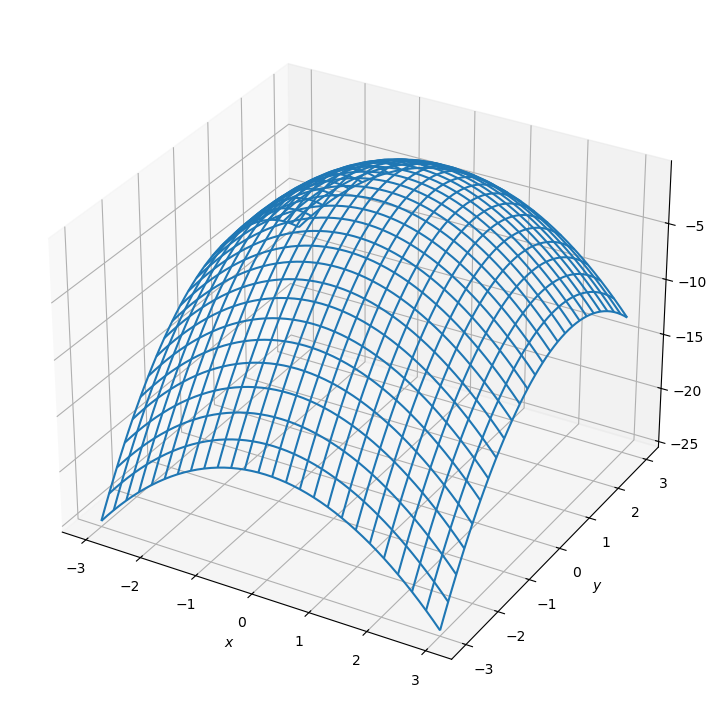

In [68]:
x = np.linspace(-3,3,51)
y = np.linspace(-3,3,51)
X, Y = np.meshgrid(x,y)
Z = parabol([X,Y])

figura = plt.figure(1,figsize=(10,9))
ax = plt.axes(projection="3d")
ax.plot_wireframe(X,Y,Z,cmap="viridis")
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel('z')
plt.show()

In [69]:
simplex_2D(parabol,0.000001)

[array([5.41389777e-04, 1.00069352e+00]), -7.74076744319656e-07]

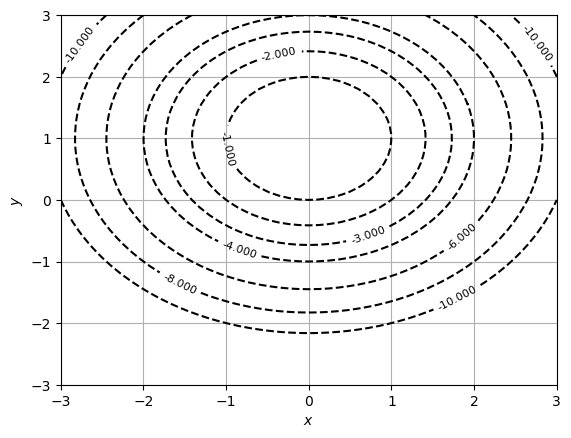

In [70]:
contours = plt.contour(X,Y,Z, levels = np.array([-10,-8,-6,-4,-3,-2,-1,0]), colors='black')
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.3f')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()
plt.show()

# Desarrollo Tarea

In [71]:
# Graficar 3D normal y por curvas de nivel
def graph(func):
    x = np.linspace(-3,3,51)
    y = np.linspace(-3,3,51)
    X, Y = np.meshgrid(x,y)
    Z = func([X,Y])
    figura = plt.figure(1,figsize=(10,9))
    ax = plt.axes(projection="3d")
    ax.plot_wireframe(X,Y,Z,cmap="viridis")
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel('z')
    plt.show()

def graph_level_curves(func):
    x = np.linspace(-3, 3, 400)
    y = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])
    
    # Aplicar máscara para evitar divisiones por cero en la función_2
    Z = np.nan_to_num(Z, nan=np.inf)
    
    plt.figure(figsize=(8, 6))
    contours = plt.contour(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 40), cmap='viridis')
    plt.clabel(contours, inline=True, fontsize=8, fmt='%1.2f')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.grid(True)
    plt.title('Curvas de Nivel')
    plt.show()

def simplex_2D_visual(func, TOL):
    distan = 1
    f_refl = 1
    f_expa = 2
    f_cont = 0.5
    f_rempl = 0.5

    x0 = np.array([0, 0])
    x1 = distan / (2 * np.sqrt(2)) * np.array([np.sqrt(3) + 1, np.sqrt(3) - 1])
    x2 = distan / (2 * np.sqrt(2)) * np.array([np.sqrt(3) - 1, np.sqrt(3) + 1])
    puntos = np.array([x0, x1, x2])
    Q_val = [func(i) for i in puntos]

    # Almacenar cada conjunto de puntos para visualización
    historial_puntos = [puntos.copy()]

    while abs(max(Q_val) - min(Q_val)) > TOL:
        centroide = np.mean(np.delete(puntos, np.argmin(Q_val), axis=0), axis=0)
        Q_max = max(Q_val)
        Q_min = min(Q_val)
        x_max = puntos[np.argmax(Q_val)]
        x_min = puntos[np.argmin(Q_val)]
        x_new = (1 + f_refl) * centroide - f_refl * x_min
        Q_new = func(x_new)

        if Q_max < Q_new:
            x_expa = f_expa * x_new + (1 - f_expa) * centroide
            Q_expa = func(x_expa)
            if Q_expa > Q_new:
                puntos[np.argmin(Q_val)] = x_expa
                Q_val[np.argmin(Q_val)] = Q_expa
            else:
                puntos[np.argmin(Q_val)] = x_new
                Q_val[np.argmin(Q_val)] = Q_new
        elif Q_new > np.delete(Q_val, [np.argmin(Q_val), np.argmax(Q_val)], axis=0).min():
            puntos[np.argmin(Q_val)] = x_new
            Q_val[np.argmin(Q_val)] = Q_new
        elif Q_new > Q_min:
            x_contra = f_cont * x_min + (1 - f_cont) * centroide
            Q_contra = func(x_contra)
            if Q_contra > Q_min:
                puntos[np.argmin(Q_val)] = x_contra
                Q_val[np.argmin(Q_val)] = Q_contra
            else:
                puntos = np.array([x_max, (1 - f_rempl) * x_max + f_rempl * x_min,
                                   (1 - f_rempl) * x_max + f_rempl * np.delete(puntos, [np.argmax(Q_val), np.argmin(Q_val)], axis=0)[0]])
                Q_val = [func(i) for i in puntos]
        else:
            puntos = np.array([x_max, (1 - f_rempl) * x_max + f_rempl * x_min,
                               (1 - f_rempl) * x_max + f_rempl * np.delete(puntos, [np.argmax(Q_val), np.argmin(Q_val)], axis=0)[0]])
            Q_val = [func(i) for i in puntos]

        historial_puntos.append(puntos.copy())

    return [x_max, Q_max], historial_puntos

def plot_simplex_frames(func, historial_puntos):
    x = np.linspace(-3, 3, 400)
    y = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])

    plt.figure(figsize=(10, 8))
    cp = plt.contourf(X, Y, Z, 50, cmap='viridis')
    plt.colorbar(cp)
    for puntos in historial_puntos:
        for simplex in puntos:
            plt.plot(*zip(*simplex), marker='o', markersize=5, linestyle='-', linewidth=2, color='red')
            plt.fill(*zip(*simplex), alpha=0.2, color='red')
    plt.show()


In [79]:
funcion_1 = lambda x: (x[0]**2+3*x[1]**2)*np.exp(-x[0]**2-x[1]**2)

plot_simplex_frames(funcion_1, simplex_2D_visual(funcion_1, 0.000001)[1])

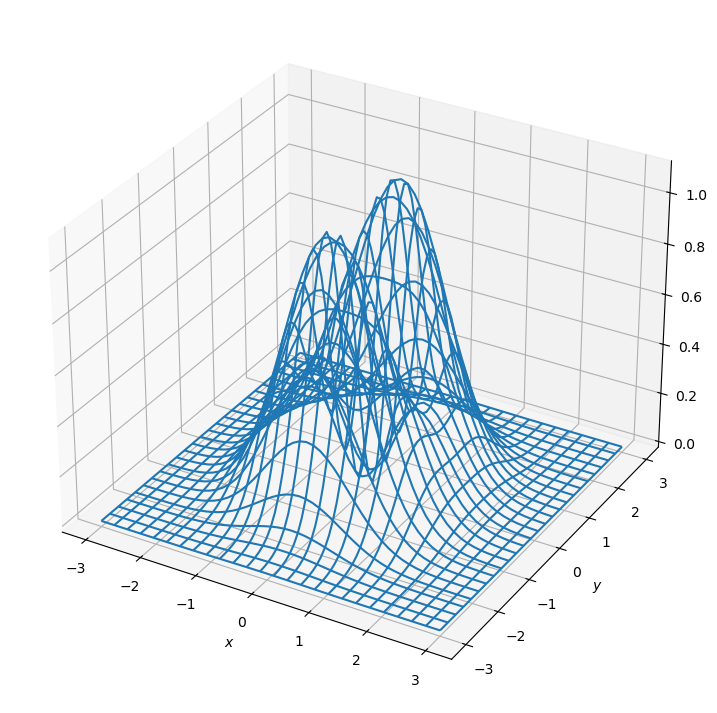

/tmp/ipykernel_8248/4289226622.py:4: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipykernel_8248/4289226622.py:4: RuntimeWarning:

invalid value encountered in divide

/home/thechieft/Documents/GitHub/MetodosNumericos/.conda/lib/python3.11/site-packages/mpl_toolkits/mplot3d/proj3d.py:177: RuntimeWarning:

invalid value encountered in divide



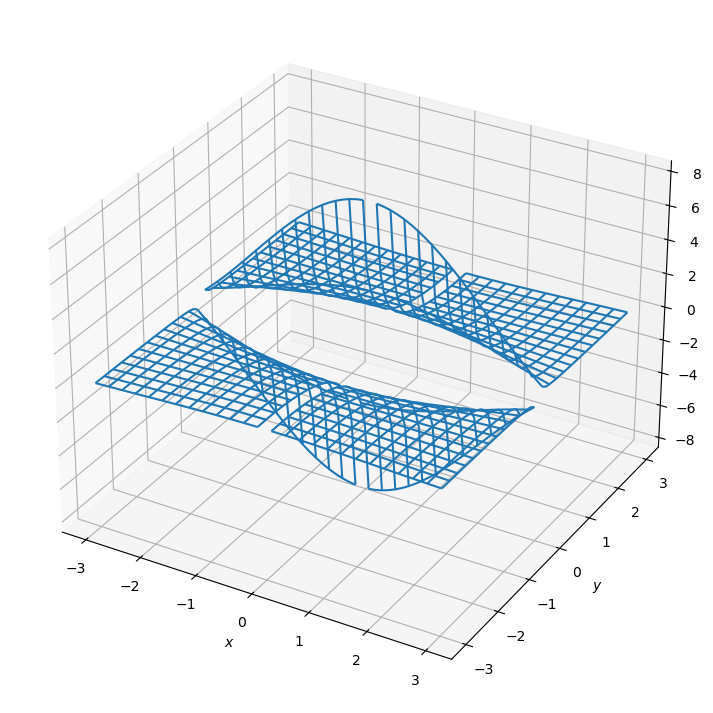

In [80]:
# f(x, y) = (x**2 + 3*y**2)*exp(-x**2-y**2)
funcion_1 = lambda x: (x[0]**2+3*x[1]**2)*np.exp(-x[0]**2-x[1]**2)
# f(x,y) = (sin(x)*cos(y))/x*Y
funcion_2 = lambda x: (np.sin(x[0])*np.cos(x[1]))/(x[0]*x[1])

graph(funcion_1)
graph(funcion_2)

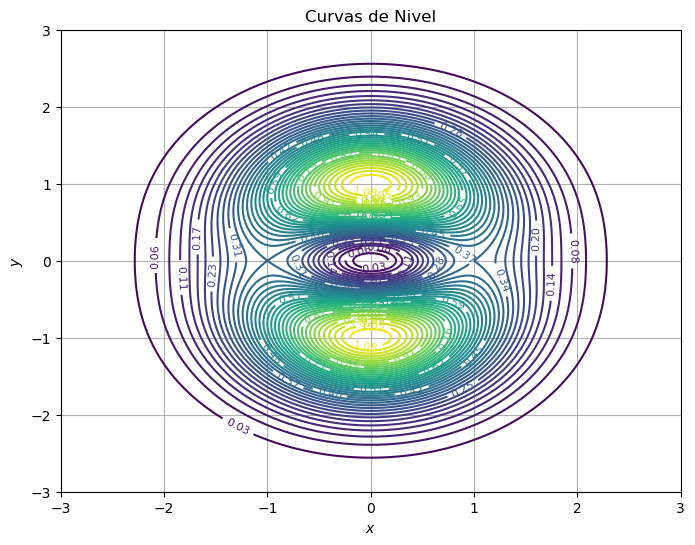

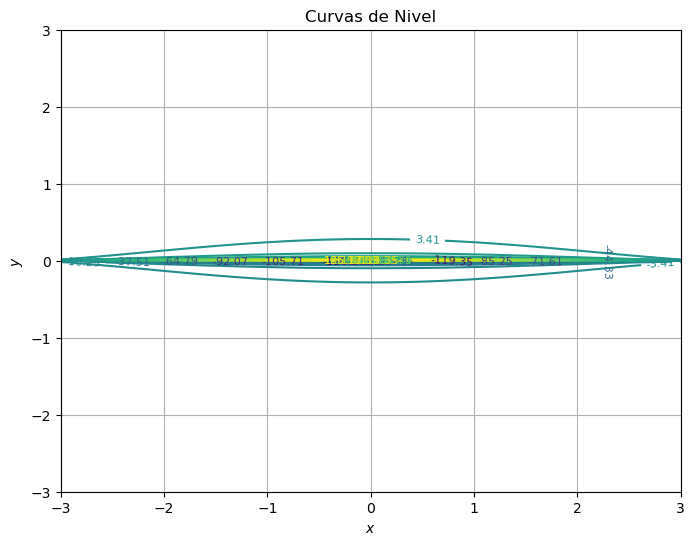

In [73]:
# Graficar curvas de nivel
graph_level_curves(funcion_1)
graph_level_curves(funcion_2)

In [74]:
simplex_2D(funcion_1,0.000001)

[array([-4.21875141e-04,  1.00002158e+00]), 1.1036381915345295]

In [75]:
simplex_2D2(funcion_2,0.000001)

/tmp/ipykernel_8248/4289226622.py:4: RuntimeWarning:

overflow encountered in scalar divide

/tmp/ipykernel_8248/3294299539.py:14: RuntimeWarning:

invalid value encountered in scalar subtract



[array([2.03388936e-001, 1.11630058e-309]), inf]

KeyboardInterrupt: 

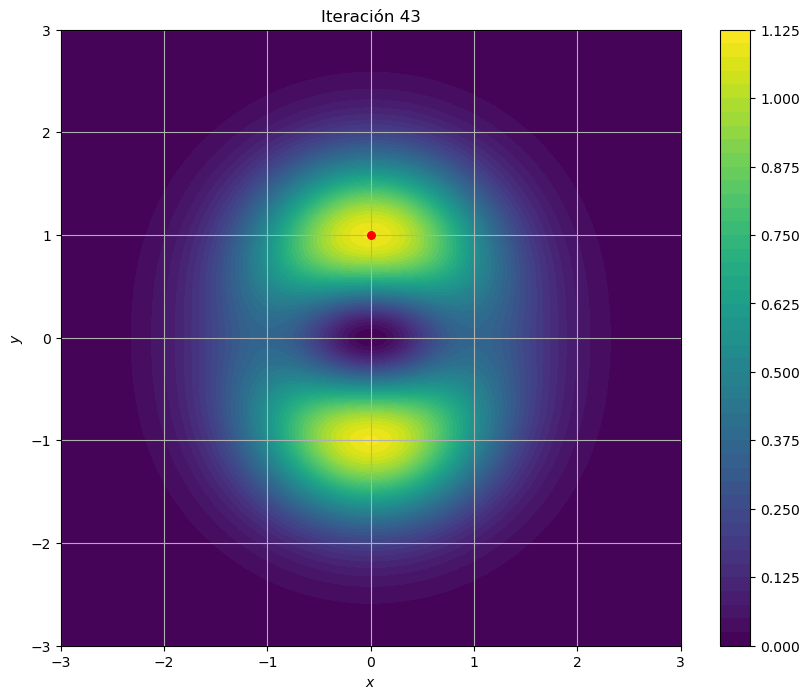

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función
def funcion_1(coords):
    x, y = coords
    return (x**2 + 3*y**2) * np.exp(-x**2 - y**2)

def funcion_2(coords):
    x, y = coords
    return (np.sin(x) * np.cos(y)) / (x * y)

# Implementación del método simplex con almacenamiento de historial
def simplex_2D_visual(func, TOL, x0 = np.array([0, 0])):
    distan = 1
    f_refl = 1
    f_expa = 2
    f_cont = 0.5
    f_rempl = 0.5

    x0 = x0
    x1 = distan / (2 * np.sqrt(2)) * np.array([np.sqrt(3) + 1, np.sqrt(3) - 1])
    x2 = distan / (2 * np.sqrt(2)) * np.array([np.sqrt(3) - 1, np.sqrt(3) + 1])
    puntos = np.array([x0, x1, x2])
    Q_val = [func(i) for i in puntos]

    historial_puntos = [puntos.copy()]

    while abs(max(Q_val) - min(Q_val)) > TOL:
        centroide = np.mean(np.delete(puntos, np.argmin(Q_val), axis=0), axis=0)
        x_max = puntos[np.argmax(Q_val)]
        x_min = puntos[np.argmin(Q_val)]
        x_new = (1 + f_refl) * centroide - f_refl * x_min
        Q_new = func(x_new)

        if Q_new > max(Q_val):
            x_expa = f_expa * x_new + (1 - f_expa) * centroide
            Q_expa = func(x_expa)
            if Q_expa > Q_new:
                puntos[np.argmin(Q_val)] = x_expa
                Q_val[np.argmin(Q_val)] = Q_expa
            else:
                puntos[np.argmin(Q_val)] = x_new
                Q_val[np.argmin(Q_val)] = Q_new
        elif Q_new > min(Q_val):
            x_contra = f_cont * x_min + (1 - f_cont) * centroide
            Q_contra = func(x_contra)
            if Q_contra > min(Q_val):
                puntos[np.argmin(Q_val)] = x_contra
                Q_val[np.argmin(Q_val)] = Q_contra
            else:
                puntos = np.array([x_max, (1 - f_rempl) * x_max + f_rempl * x_min, (1 - f_rempl) * x_max + f_rempl * np.delete(puntos, [np.argmax(Q_val), np.argmin(Q_val)], axis=0)[0]])
                Q_val = [func(i) for i in puntos]
        else:
            puntos = np.array([x_max, (1 - f_rempl) * x_max + f_rempl * x_min, (1 - f_rempl) * x_max + f_rempl * np.delete(puntos, [np.argmax(Q_val), np.argmin(Q_val)], axis=0)[0]])
            Q_val = [func(i) for i in puntos]

        historial_puntos.append(puntos.copy())

    # Recalcular Q_max antes de retornarlo
    Q_max = max(Q_val)
    return [x_max, Q_max], historial_puntos
    

def plot_simplex_frames(func, historial_puntos):
    x = np.linspace(-3, 3, 400)
    y = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])

    for i, puntos in enumerate(historial_puntos):
        plt.figure(figsize=(10, 8))
        cp = plt.contourf(X, Y, Z, 50, cmap='viridis')
        plt.colorbar(cp)
        plt.plot(*zip(*puntos), marker='o', markersize=5, linestyle='-', linewidth=2, color='red')
        plt.fill(*zip(*puntos), alpha=0.2, color='red')
        plt.title(f'Iteración {i+1}')
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.grid(True)
        plt.savefig(f'simplex_iteracion_{i+1}.png')  # Guardar la imagen
        plt.close()  # Cerrar la figura para liberar memoria

# Asegúrate de que `result` y `historial_puntos` son los obtenidos del algoritmo simplex.
result, historial_puntos = simplex_2D_visual(funcion_1, 0.000000001)
plot_simplex_frames(funcion_1, historial_puntos)

# Ejecutar el algoritmo simplex
result, historial_puntos = simplex_2D_visual(funcion_1, 0.000000001)

# Visualizar los resultados
plot_simplex_frames(funcion_1, historial_puntos)


Esto le descargará imagenes, que sería el recorrido de el método en la gráfica de curvas de nivel

In [87]:
simplex_2D_visual(funcion_2, 0.000000001, np.array([1, 1]))

/tmp/ipykernel_8248/2897677019.py:11: RuntimeWarning:

overflow encountered in scalar divide

/tmp/ipykernel_8248/2897677019.py:29: RuntimeWarning:

invalid value encountered in scalar subtract



([array([2.03388936e-001, 1.11630058e-309]), inf],
 [array([[1.        , 1.        ],
         [0.96592583, 0.25881905],
         [0.25881905, 0.96592583]]),
  array([[0.22474487, 0.22474487],
         [0.96592583, 0.25881905],
         [0.25881905, 0.96592583]]),
  array([[0.22474487, 0.22474487],
         [0.24178196, 0.59533535],
         [0.59533535, 0.24178196]]),
  array([[0.22474487, 0.22474487],
         [0.23326341, 0.41004011],
         [0.41004011, 0.23326341]]),
  array([[0.22474487, 0.22474487],
         [0.40152157, 0.04796818],
         [0.41004011, 0.23326341]]),
  array([[0.22474487, 0.22474487],
         [0.40152157, 0.04796818],
         [0.21622633, 0.03944963]]),
  array([[0.21622633, 0.03944963],
         [0.2204856 , 0.13209725],
         [0.30887395, 0.0437089 ]]),
  array([[0.21622633, 0.03944963],
         [0.21835596, 0.08577344],
         [0.26255014, 0.04157927]]),
  array([[0.21622633, 0.03944963],
         [0.21729115, 0.06261154],
         [0.23938823, 0

In [85]:
simplex_2D_visual(funcion_1, 0.000000001)

([array([8.54096125e-06, 9.99983383e-01]), 1.103638322851187],
 [array([[0.        , 0.        ],
         [0.96592583, 0.25881905],
         [0.25881905, 0.96592583]]),
  array([[0.30618622, 0.30618622],
         [0.96592583, 0.25881905],
         [0.25881905, 0.96592583]]),
  array([[0.45927933, 0.45927933],
         [0.96592583, 0.25881905],
         [0.25881905, 0.96592583]]),
  array([[0.45927933, 0.45927933],
         [0.66248751, 0.48571081],
         [0.25881905, 0.96592583]]),
  array([[0.4599663 , 0.59254882],
         [0.66248751, 0.48571081],
         [0.25881905, 0.96592583]]),
  array([[0.4599663 , 0.59254882],
         [0.05629784, 1.07276384],
         [0.25881905, 0.96592583]]),
  array([[0.30876237, 0.80594683],
         [0.05629784, 1.07276384],
         [0.25881905, 0.96592583]]),
  array([[0.23316041, 0.91264583],
         [0.05629784, 1.07276384],
         [0.25881905, 0.96592583]]),
  array([[0.19535942, 0.96599533],
         [0.05629784, 1.07276384],
         [0

### Test gráfica en R3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection  # Importación correcta

# Función para visualizar cada iteración del método simplex en 3D
def plot_simplex_frames_3D(func, historial_puntos):
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])

    for i, puntos in enumerate(historial_puntos):
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5, cmap='viridis', edgecolor='none')
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.set_zlabel('$z$')

        # Extraer las coordenadas x, y, z de los puntos simplex
        simplex_x = puntos[:, 0]
        simplex_y = puntos[:, 1]
        simplex_z = [func([x, y]) for x, y in zip(simplex_x, simplex_y)]  # Evaluamos func en cada punto del simplex

        # Dibujar el simplex como líneas y puntos en la gráfica 3D
        ax.plot(simplex_x, simplex_y, simplex_z, color='r', marker='o', linestyle='-', linewidth=2, markersize=5)
        # Dibujar el plano que contiene los puntos simplex
        verts = [list(zip(simplex_x, simplex_y, simplex_z))]
        ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolor='r', alpha=.25))

        plt.title(f'Iteración {i+1}')
        plt.savefig(f'simplex_3D_iteracion_{i+1}.png')  # Guardar la imagen
        plt.close()  # Cerrar la figura para liberar memoria

# Asegúrate de que `result` y `historial_puntos` son los obtenidos del algoritmo simplex.
result, historial_puntos = simplex_2D_visual(funcion_1, 0.000000001)
plot_simplex_frames_3D(funcion_1, historial_puntos)


NameError: name 'simplex_2D_visual' is not defined